In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
covid_df=pd.read_csv('C:/Users/DELL/Downloads/covid_19_india.csv')

In [13]:
covid_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [32]:
covid_df=pd.read_csv('C:/Users/DELL/Downloads/covid_vaccine_statewise.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/DELL/Downloads/covid_vaccine_statewise.csv'

In [31]:
vaccine_df.head()

NameError: name 'vaccine_df' is not defined

In [19]:
#drop colomns
covid_df.drop(["ConfirmedIndianNational","Sno","Time","ConfirmedForeignNational"],inplace=True,axis=1)

In [20]:
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0.0,0.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0
2,2020-02-01,Kerala,0.0,0.0,2.0
3,2020-02-02,Kerala,0.0,0.0,3.0
4,2020-02-03,Kerala,0.0,0.0,3.0


In [22]:
#format cahnge
covid_df['Date']=pd.to_datetime(covid_df['Date'],format = '%Y-%m-%d')

In [23]:
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0.0,0.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0
2,2020-02-01,Kerala,0.0,0.0,2.0
3,2020-02-02,Kerala,0.0,0.0,3.0
4,2020-02-03,Kerala,0.0,0.0,3.0


In [26]:
#find active cases
covid_df['Active_Cases']=covid_df['Confirmed']-(covid_df['Cured']+covid_df['Deaths'])
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_Cases
0,2020-01-30,Kerala,0.0,0.0,1.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0,1.0
2,2020-02-01,Kerala,0.0,0.0,2.0,2.0
3,2020-02-02,Kerala,0.0,0.0,3.0,3.0
4,2020-02-03,Kerala,0.0,0.0,3.0,3.0


In [35]:
statewise=pd.pivot_table(covid_df,values=["Confirmed","Deaths","Cured"],index="State/UnionTerritory",aggfunc=max)

In [37]:
statewise["Recovery Rate"]=statewise["Cured"]*100/statewise["Confirmed"]

In [38]:
statewise["Mortality Rate"]=statewise["Cured"]*100/statewise["Confirmed"]

In [39]:
statewise=statewise.sort_values(by="Confirmed",ascending=False)

In [40]:
statewise.style.background_gradient(cmap="cubehelix")

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Maharashtra,5433506.000000,4927480.000000,83777.000000,90.686934,90.686934
Karnataka,2272374.000000,1674487.000000,22838.000000,73.688882,73.688882
Kerala,2200706.000000,1846105.000000,6612.000000,83.886944,83.886944
Tamil Nadu,1664350.000000,1403052.000000,18369.000000,84.300297,84.300297
Uttar Pradesh,1637663.000000,1483249.000000,18072.000000,90.571076,90.571076
Andhra Pradesh,1475372.000000,1254291.000000,9580.000000,85.015237,85.015237
Delhi,1402873.000000,1329899.000000,22111.000000,94.798246,94.798246
West Bengal,1171861.000000,1026492.000000,13576.000000,87.595030,87.595030
Chhattisgarh,925531.000000,823113.000000,12036.000000,88.934136,88.934136


In [44]:
#top 10 active cases states
top_10=covid_df.groupby(by="State/UnionTerritory").max()[['Active_Cases','Date']]

Text(0.5, 1.0, 'top_10 cases')

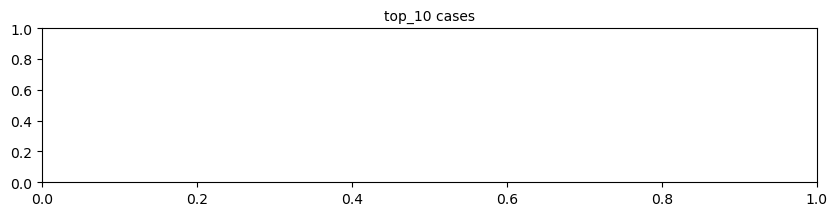

In [47]:
plt.figure(figsize=(10,2))
plt.title("top_10 cases",size=10)

In [56]:
ax=sns.barplot(data=top_10.iloc[:10], y = "Active_Cases", x = "State/UnionTerritory", linewidth=2,edgecolor='red')

ValueError: Could not interpret input 'State/UnionTerritory'

Text(0.5, 1.0, 'top_10_deaths')

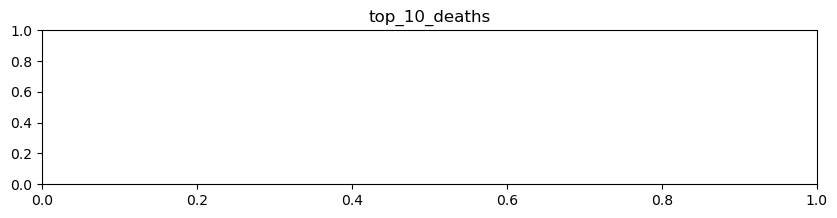

In [58]:
#top 10 states deaths
top_10_deaths=covid_df.groupby(by="State/UnionTerritory").max()[['Deaths','Date']].sort_values(by=['Deaths'],ascending=False).reset_index()
plt.figure(figsize=(10,2))
plt.title('top_10_deaths')

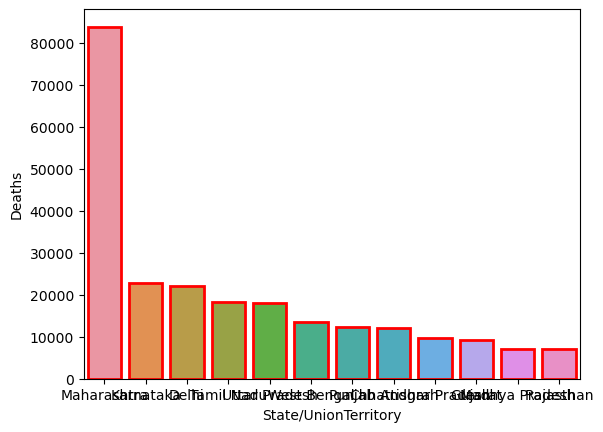

In [61]:
ax=sns.barplot(data=top_10_deaths.iloc[:12],y="Deaths",x="State/UnionTerritory",linewidth=2,edgecolor='red')

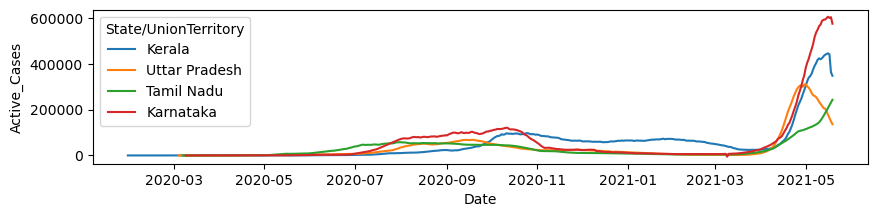

In [68]:
#growth trendor 
plt.figure(figsize=(10,2))
ax = sns.lineplot(data=covid_df[covid_df['State/UnionTerritory'].isin(['Maharastra', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Uttar Pradesh'])],
                  x='Date', y='Active_Cases', hue='State/UnionTerritory')